In [1]:
!pip install pytesseract

In [2]:
from google.colab import files
from IPython.display import Image

In [3]:
uploaded = files.upload()

Saving Screenshot 2024-03-23 130440.png to Screenshot 2024-03-23 130440.png


In [4]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,624 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [5]:
import cv2
import os
import re
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [37]:
img = cv2.imread('elon.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(img, (7, 9), 0)
# (T, threshInv) = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
# thresh = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
# thresh = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)

#change the threshold values for better result on your image
_, img = cv2.threshold(img, 220, 180, 105)

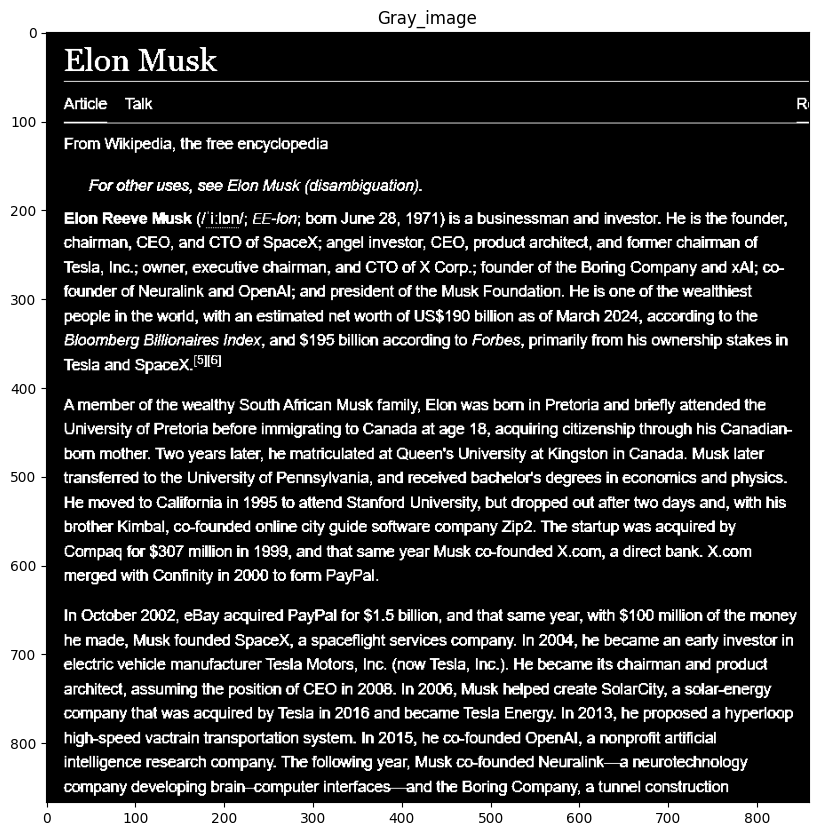

In [38]:
plt.figure(figsize=(10,10))
plt.title('Gray_image')
plt.imshow(img, cmap='gray')
# ; plt.xticks([]); plt.yticks([])
# plt.show('img4.png')

In [39]:
text = pytesseract.image_to_string(img).encode("utf-8")
text = text.decode('utf-8')
tokens = text.split()
print(tokens)

['PTA', 'Core', 'WV', 'ENTS)', '<', 'Article', 'Talk', 'is', 'From', 'Wikipedia,', 'the', 'free', 'encyclopedia', 'Bee', 'MB', 'aOR', '(OST', 'ee', 'elt)', 'PS', 'Cea', 'I)', 'aan', 'elaine', 'oe', 'NL', 'cM', 'EMULE', 'LR', 'CARL', 'melo', '1m', 'chairman,', 'CEO,', 'and', 'CTO', 'of', 'SpaceX;', 'angel', 'investor,', 'CEO,', 'product', 'architect,', 'and', 'former', 'chairman', 'of', 'Tesla,', 'Inc.;', 'owner,', 'executive', 'chairman,', 'and', 'CTO', 'of', 'X', 'Corp.;', 'founder', 'of', 'the', 'Boring', 'Company', 'and', 'xAl;', 'co-', 'founder', 'of', 'Neuralink', 'and', 'OpenAl;', 'and', 'president', 'of', 'the', 'Musk', 'Foundation.', 'He', 'is', 'one', 'of', 'the', 'wealthiest', 'fee', 'AR', 'ee', 'MEET', 'Rn', 'el', 'ane', 'Osh', 'EON', '|', 'ole', 'Re', 'ke', 'Pie', 'eens', 'fel', 'ale', 'OR', 'Bloomberg', 'Billionaires', 'Index,', 'and', '$195', 'billion', 'according', 'to', 'Forbes,', 'primarily', 'from', 'his', 'ownership', 'stakes', 'in', 'BOE', 'Bsr', 'ae', 'Amember', 'o

In [51]:
Names = []
pattern = re.compile(r'age')
if "age" in tokens:
  location = tokens.index('age')
  for i in range(1,11):
    result = tokens[location + i]
    Names.append(result)
else:
  print("age not found!")

listToStr = ' '.join(map(str, Names))
print("Age: ", listToStr)

Age:  18, acquiring citizenship through his Canadian- bom mother. Two years


In [52]:
pattern = re.compile(r'name', re.IGNORECASE)

for word in tokens:
    if re.match(pattern, word):
     location = tokens.index(word)



In [56]:
CEO = []
Age = []
CTO = []
Extract = [CEO, Age, CTO]

name_ = re.compile(r'CEO*', re.IGNORECASE)
age_ = re.compile(r'age*', re.IGNORECASE)
date_ = re.compile(r'CTO*', re.IGNORECASE)

for data in Extract:
  for word in tokens:
    if re.match(name_, word):
      location = tokens.index(word)
      for i in range(1,11):
        result = tokens[location + i]
        Extract[0].append(result)
  for word in tokens:
    if re.match(age_, word):
      location = tokens.index(word)
      for i in range(1,5):
        result = tokens[location + i]
        Extract[1].append(result)
  for word in tokens:
    if re.match(date_, word):
      location = tokens.index(word)
      for i in range(1,2):
        result = tokens[location + i]
        Extract[2].append(result)
  break
listToStr = ' '.join(map(str, CEO))
listToStr1 = ' '.join(map(str, Age))
listToStr2 = ' '.join(map(str, CTO))
print("CEO: ",listToStr)
print("Age: ",listToStr1)
print("CTO: ",listToStr2)

CEO:  I) aan elaine oe NL cM EMULE LR CARL melo and CTO of SpaceX; angel investor, CEO, product architect, and and CTO of SpaceX; angel investor, CEO, product architect, and water eee Ue BO ede Re oC Ee Rd he in 2008. In 2006, Musk helped create SolarCity, a solar-energy
Age:  18, acquiring citizenship through
CTO:  of of


In [58]:
print(tokens)

['PTA', 'Core', 'WV', 'ENTS)', '<', 'Article', 'Talk', 'is', 'From', 'Wikipedia,', 'the', 'free', 'encyclopedia', 'Bee', 'MB', 'aOR', '(OST', 'ee', 'elt)', 'PS', 'Cea', 'I)', 'aan', 'elaine', 'oe', 'NL', 'cM', 'EMULE', 'LR', 'CARL', 'melo', '1m', 'chairman,', 'CEO,', 'and', 'CTO', 'of', 'SpaceX;', 'angel', 'investor,', 'CEO,', 'product', 'architect,', 'and', 'former', 'chairman', 'of', 'Tesla,', 'Inc.;', 'owner,', 'executive', 'chairman,', 'and', 'CTO', 'of', 'X', 'Corp.;', 'founder', 'of', 'the', 'Boring', 'Company', 'and', 'xAl;', 'co-', 'founder', 'of', 'Neuralink', 'and', 'OpenAl;', 'and', 'president', 'of', 'the', 'Musk', 'Foundation.', 'He', 'is', 'one', 'of', 'the', 'wealthiest', 'fee', 'AR', 'ee', 'MEET', 'Rn', 'el', 'ane', 'Osh', 'EON', '|', 'ole', 'Re', 'ke', 'Pie', 'eens', 'fel', 'ale', 'OR', 'Bloomberg', 'Billionaires', 'Index,', 'and', '$195', 'billion', 'according', 'to', 'Forbes,', 'primarily', 'from', 'his', 'ownership', 'stakes', 'in', 'BOE', 'Bsr', 'ae', 'Amember', 'o

In [60]:
for su in tokens:
  if "age" in tokens:
    location = tokens.index('age')
    for i in range(1,2):
      print(" " + (tokens[location + i]), end=" ")
    # print(location)
    break


 18, 

In [ ]:
file = open('output.txt','a')
file.write(text)
file.close()